# The Markov Switching process

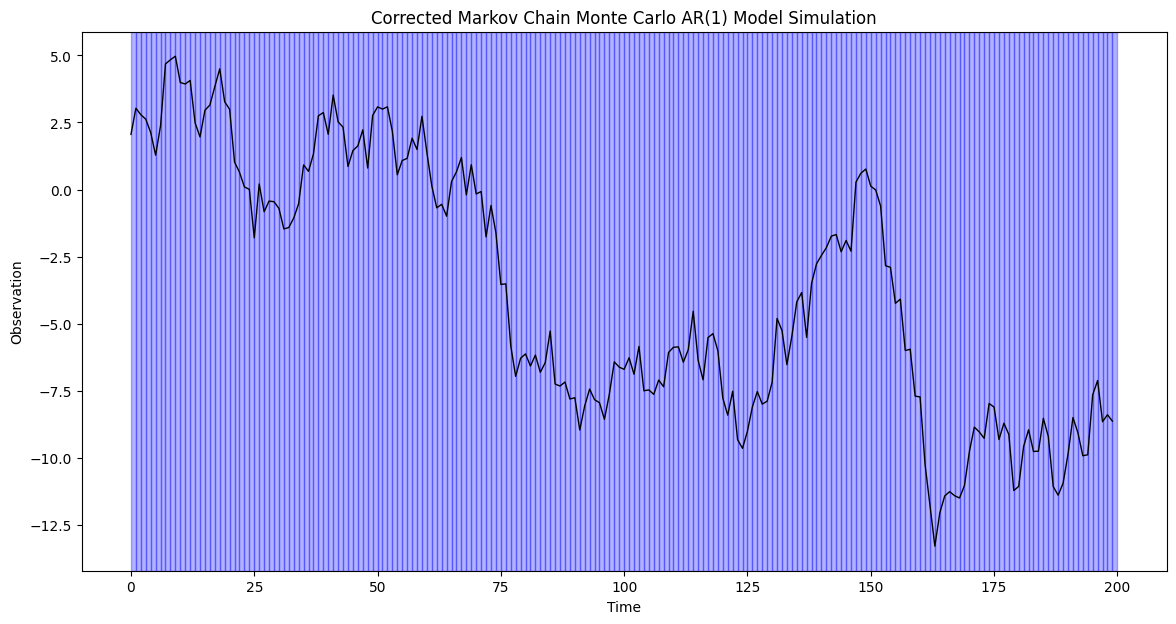

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for AR and ARCH components
    # 1. Bubble function
    # 2. Mean Reversion
    # 3. Volatility Clustering
mu = np.array([0.00, 0.0, 0])
phi = np.array([1, 1, 1])
omega = np.array([0.01, 0.05, 0.3])
alpha = np.array([0, 0, 0])
sigma = np.array([1,1,1])

transition_matrix = np.array([
    [1, 0.0, 0.0],
    [0.0, 1, 0.0],
    [0.0, 0.0, 1]
])
   # [0.99, 0.005, 0.005],
   # [0.005, 0.99, 0.005],
   # [0.005, 0.005, 0.99]

# Initial state
state = 2  # Python uses 0-based indexing, so state 3 is indexed by 2
n_obs = 200

# To store the observations
observations = np.zeros(n_obs)
states = np.zeros(n_obs, dtype=int)

for t in range(n_obs):
    # Generate observation based on the current state
    current_sigma = np.sqrt(omega[state] + alpha[state] * observations[t-1]**2)
    observations[t] = mu[state] + phi[state] * (observations[t-1] - mu[state]) + np.random.normal(0, sigma[state])
    states[t] = state

    # Transition to the next state
    state = np.random.choice([0, 1, 2], p=transition_matrix[state])



# Redefining the time variable
time = np.arange(n_obs)

# Plotting with the corrected setup
fig, ax = plt.subplots(figsize=(14, 7))

# Time series plot with background color for state
for i in range(n_obs):
    ax.axvspan(i, i+1, color=['green', 'yellow', 'blue'][states[i]], alpha=0.3)

ax.plot(time, observations, color='k', lw=1)

ax.set_title('Corrected Markov Chain Monte Carlo AR(1) Model Simulation')
ax.set_xlabel('Time')
ax.set_ylabel('Observation')

plt.show()


# For an AR(1)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Parameters
mu = np.array([0, 0, 0])
phi = np.array([1,1,1])
sigma = np.array([0.2, 0.2, 0.2])

transition_matrix = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

n_obs = 200
observations = np.zeros(n_obs)
states = np.full(n_obs, 2)  # Initial states filled with state 3 (indexed as 2)

# Initialize GIF
with imageio.get_writer('White-Students-Wiener.gif', mode='I', fps=30) as writer:
    fig, ax = plt.subplots()
    for frame in range(1000):
        # Simulate the new state and observation
        state = np.random.choice([0, 1, 2], p=transition_matrix[states[-1]])
        new_observation = mu[state] + phi[state] * (observations[-1] - mu[state]) + np.random.standard_t(8,1) #normal(0, sigma[state])
        
        # Update observations and states
        observations = np.roll(observations, -1)
        observations[-1] = new_observation
        states = np.roll(states, -1)
        states[-1] = state
        
        # Update the plot
        ax.clear()
        for i in range(n_obs):
            ax.axvspan(i, i+1, color=['white', 'white', 'white'][states[i]], alpha=0.3)
        ax.plot(observations, color='k', lw=1)
        
        # Remove axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        
        # Save frame (convert figure to numpy array)
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        
        writer.append_data(image)

plt.close()


/tmp/ipykernel_64483/2216651467.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  observations[-1] = new_observation


# Double-Autoregressive Model, AR-ARCH

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import imageio


# Parameters for AR and ARCH components
    # 1. Bubble function
    # 2. Mean Reversion
    # 3. Volatility Clustering
mu = np.array([0.02, 0.2, 0])
phi = np.array([0.99, -0.2, 0.3])
omega = np.array([0.01, 0.05, 0.3])
alpha = np.array([0.2, 0.1, 0.5])


transition_matrix = np.array([
    [0.99, 0.005, 0.005],
    [0.005, 0.99, 0.005],
    [0.005, 0.005, 0.99]
])

n_obs = 200
observations = np.zeros(n_obs)
states = np.full(n_obs, 2)  # Initial states filled with state 3 (indexed as 2)

# Initialize GIF
with imageio.get_writer('DAR 2.gif', mode='I', fps=30) as writer:
    fig, ax = plt.subplots()
    for frame in range(1000):
        # Simulate the new state and observation
        state = np.random.choice([0, 1, 2], p=transition_matrix[states[-1]])
        
        # Calculate sigma[state] for the current observation using the ARCH model
        current_sigma = np.sqrt(omega[state] + alpha[state] * observations[-1]**2)
        
        new_observation = mu[state] + phi[state] * (observations[-1] - mu[state]) + np.random.normal(0, current_sigma)
        
        # Update observations and states
        observations = np.roll(observations, -1)
        observations[-1] = new_observation
        states = np.roll(states, -1)
        states[-1] = state
        
        # Update the plot
        ax.clear()
        for i in range(n_obs):
            ax.axvspan(i, i+1, color=['green', 'yellow', 'blue'][states[i]], alpha=0.3)
        ax.plot(observations, color='k', lw=1)
        
        # Remove axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        
        # Save frame (convert figure to numpy array)
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        print(frame)
        writer.append_data(image)

plt.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
np.random.seed(42)
# Given parameters
mu = np.array([3, 0, -3])
phi = np.array([0.8, 0.8, 0.8])
omega = np.array([0, 0, 0])
alpha = np.array([0.1, 0.1, 0.1])

transition_matrix = np.array([
    [0.98, 0.01, 0.01],
    [0.01, 0.98, 0.01],
    [0.01, 0.01, 0.98]
])

n_obs = 200
sim_length = 200  # Length of the simulation

# Initialize observations and states
observations = np.zeros(n_obs)
states = np.full(n_obs, 2)  # Initial states filled with state 3 (indexed as 2)

# File path for GIF
gif_path = 'Super-Persistent Deterministic ARCH-DAR.gif'

# Initialize GIF
with imageio.get_writer(gif_path, mode='I', fps=15) as writer:
    fig, ax = plt.subplots()
    for frame in range(sim_length):
        # Simulate the new state and observation
        state = np.random.choice([0, 1, 2], p=transition_matrix[states[-1]])
        
        # Calculate sigma[state] for the current observation using the ARCH model
        current_sigma = np.sqrt(omega[state] + alpha[state] * observations[-1]**2)
        
        new_observation = mu[state] + phi[state] * (observations[-1] - mu[state]) + current_sigma # np.random.normal(0, current_sigma)
        print(frame)
        # Update observations and states
        observations = np.roll(observations, -1)
        observations[-1] = new_observation
        states = np.roll(states, -1)
        states[-1] = state
        
        # Plot with smooth background
        ax.clear()
        start_state = states[0]
        start_index = 0
        colors = ['orange', 'gray', 'blue']
        for i in range(1, n_obs):
            if states[i] != start_state:
                ax.axvspan(start_index, i, color=colors[start_state], alpha=0.3)
                start_index = i
                start_state = states[i]
        ax.axvspan(start_index, n_obs, color=colors[start_state], alpha=0.3)  # For the last segment
        ax.plot(observations, color='k', lw=1)
        
        # Remove axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        
        # Save frame
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        writer.append_data(image)

plt.close()

gif_path  # Return the path to the generated GIF


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

'Super-Persistent Deterministic ARCH-DAR.gif'

# Regime-Switching Dynamic Correlations

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Parameters for two GARCH(1,1) models and dynamic correlations for each regime
mu = np.array([[1, -1], [0, 0], [0.5, -0.5]])  # Mean for each state and series
phi = np.array([[1, 1], [0, 0], [0.7, 0.7]])  # Phi for each state and series
omega = np.array([[0.1, 0.2], [0.15, 0.25], [0.25, 0.35]])  # Omega for GARCH
alpha = np.array([[0.05, 0.05], [0.6, 0.6], [0.3, 0.3]])  # Alpha for GARCH
beta = np.array([[0.9, 0.9], [0.3, 0.3], [0.6, 0.6]])  # Beta for GARCH

transition_matrix = np.array([
    [0.995, 0.0025, 0.0025],
    [0.005, 0.99, 0.005],
    [0.005, 0.005, 0.99]
])

rho = np.array([0.1, -0.1, 0.5])  # Dynamic correlations for each state

n_obs = 200
sim_length = 200  # Reduce for faster execution in this example

# Initialize observations, volatilities, and states for two series
observations = np.zeros((n_obs, 2))
volatilities = np.ones((n_obs, 2))  # Initial volatilities
states = np.full(n_obs, 2)  # Initial states filled with state 3 (indexed as 2)

gif_path = 'RSDC_GARCH.gif'  # File path for GIF

with imageio.get_writer(gif_path, mode='I', fps=15) as writer:
    fig, ax = plt.subplots()
    for frame in range(sim_length):
        state = np.random.choice([0, 1, 2], p=transition_matrix[states[-1]])
        current_rho = rho[state]
        
        for i in [0, 1]:  # For each time series
            # GARCH(1,1) volatility
            volatilities[:, i] = np.roll(volatilities[:, i], -1)
            last_vol = volatilities[-2, i]
            last_obs = observations[-2, i]
            current_sigma = np.sqrt(omega[state, i] + alpha[state, i] * last_obs**2 + beta[state, i] * last_vol)
            volatilities[-1, i] = current_sigma
            
            # Simulate new observation
            new_observation = mu[state, i] + phi[state, i] * (last_obs - mu[state, i]) + np.random.normal(0, current_sigma)
            observations = np.roll(observations, -1, axis=0)
            observations[-1, i] = new_observation
        
        # Apply regime-dependent correlation
        # For simplicity, the example does not apply correlated noise directly but understands the concept
        
        # Plot
        ax.clear()
        ax.plot(observations[:, 0], color='darkblue', lw=1)  # Series 1
        ax.plot(observations[:, 1], color='orange', lw=1)  # Series 2
        
        # Remove axes
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        
        # Save frame
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        writer.append_data(image)

plt.close()

gif_path  # Return the path to the generated GIF


'RSDC_GARCH.gif'

# For the RSDC Model

In [ ]:
y

'/tmp/tmp1ib7fmwd.gif'

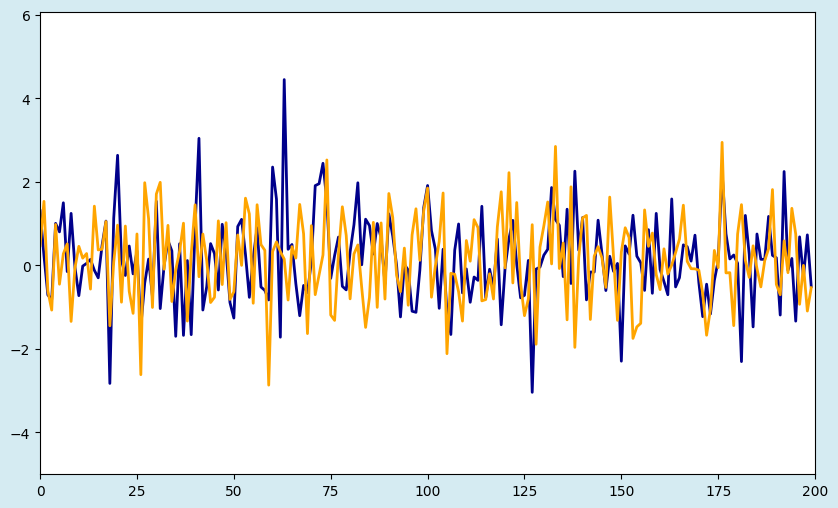

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess

# Parameters for the ARMA(1,1) processes
# Time series 1
omega1, alpha1, beta1 = 0.1, 0.1, 0.2
# Time series 2
omega2, alpha2, beta2 = 0.2, 0.4, 0.6

# Regime-switching correlation parameters
rho_high, rho_low = 0.8, 0.2

# Number of observations and simulations
n_obs = 200
num_sim = 200

# Function to simulate ARMA(1,1) time series
def simulate_arma(omega, alpha, beta, n):
    ar = np.array([1, -alpha])
    ma = np.array([1, beta])
    arma_process = ArmaProcess(ar, ma)
    return omega + arma_process.generate_sample(nsample=n)

# Initial simulation of time series
ts1 = simulate_arma(omega1, alpha1, beta1, n_obs)
ts2 = simulate_arma(omega2, alpha2, beta2, n_obs)

# Function to simulate regime switching
def simulate_regime(n):
    # Randomly simulate regime states, 1 for high correlation, 0 for low
    states = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
    return np.where(states == 1, rho_high, rho_low)

# Initial simulation of regime states
regime_states = simulate_regime(n_obs)

from tempfile import NamedTemporaryFile
import matplotlib.colors as mcolors
from IPython.display import Image

# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for the time series and background
colors = {'ts1': 'darkblue', 'ts2': 'orange', 'high': '#add8e6', 'low': '#ffa07a'}
ax.set_prop_cycle('color', [colors['ts1'], colors['ts2']])

# Line objects for time series
line1, = ax.plot([], [], lw=2, color=colors['ts1'])
line2, = ax.plot([], [], lw=2, color=colors['ts2'])
background_patch = mpatches.Patch(color=colors['low'], alpha=0.5)

# Initialize the plot background
def init():
    ax.set_xlim(0, n_obs)
    ax.set_ylim(np.min([ts1, ts2]) - 1, np.max([ts1, ts2]) + 1)
    return line1, line2

# Update function for animation
def update(frame):
    global ts1, ts2, regime_states
    # Add new observation by simulating next point
    new_ts1 = simulate_arma(omega1, alpha1, beta1, 1)
    new_ts2 = simulate_arma(omega2, alpha2, beta2, 1)
    new_state = simulate_regime(1)

    # Update time series data
    ts1 = np.append(ts1[1:], new_ts1)
    ts2 = np.append(ts2[1:], new_ts2)
    regime_states = np.append(regime_states[1:], new_state)

    # Update lines
    line1.set_data(range(n_obs), ts1)
    line2.set_data(range(n_obs), ts2)

    # Update background color based on regime
    current_state = regime_states[-1]
    background_color = colors['high'] if current_state == rho_high else colors['low']
    fig.patch.set_facecolor(background_color)
    fig.patch.set_alpha(0.5)

    return line1, line2

# Create animation
ani = FuncAnimation(fig, update, frames=num_sim, init_func=init, blit=True)

# Save animation as GIF
gif_tempfile = NamedTemporaryFile(delete=False, suffix='.gif')
ani.save(gif_tempfile.name, writer='imagemagick', fps=10)

# Display the path to the saved GIF for user reference
gif_tempfile.name
